<a href="https://colab.research.google.com/github/ortegatiago/covid19_analysis/blob/master/covid19_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/consolidated_covid_19_data.csv', sep=',', encoding='utf-8')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425513 entries, 0 to 425512
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      425513 non-null  int64  
 1   Province_State  403835 non-null  object 
 2   Country_Region  425513 non-null  object 
 3   Last_Update     425513 non-null  object 
 4   Confirmed       425513 non-null  int64  
 5   Deaths          425513 non-null  int64  
 6   Recovered       425513 non-null  int64  
 7   Lat             417739 non-null  float64
 8   Long            417739 non-null  float64
 9   file            425513 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.5+ MB


In [5]:
df.tail()

,Unnamed: 0,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Lat,Long,file
425508,3158,NaN,West Bank and Gaza,2020-04-29 02:32:29,343,2,71,31.952200,35.233200,04-28-2020.csv
425509,3159,NaN,Western Sahara,2020-04-29 02:32:29,6,0,5,24.215500,-12.885800,04-28-2020.csv
425510,3160,NaN,Yemen,2020-04-29 02:32:29,1,0,1,15.552727,48.516388,04-28-2020.csv
425511,3161,NaN,Zambia,2020-04-29 02:32:29,95,3,42,-13.133897,27.849332,04-28-2020.csv
425512,3162,NaN,Zimbabwe,2020-04-29 02:32:29,32,4,5,-19.015438,29.154857,04-28-2020.csv


In [15]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df['Last_Update'] = df['Last_Update'].dt.date
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

df = df[['Country_Region','Last_Update', 'Confirmed', 'Deaths', 'Recovered']]

In [17]:
df['Days'] = df['Last_Update'] - df['Last_Update'].min()

In [23]:
df['Days'] = df['Days'].dt.days

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425513 entries, 0 to 425512
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Country_Region  425513 non-null  object        
 1   Last_Update     425513 non-null  datetime64[ns]
 2   Confirmed       425513 non-null  int64         
 3   Deaths          425513 non-null  int64         
 4   Recovered       425513 non-null  int64         
 5   Days            425513 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ MB


In [25]:
df.describe()

,Confirmed,Deaths,Recovered,Days
count,425513.000000,425513.000000,4.255130e+05,425513.000000
mean,1783.195639,94.988071,8.350652e+02,93.456440
std,11900.776847,972.923436,1.170220e+04,36.144079
min,0.000000,0.000000,0.000000e+00,0.000000
25%,8.000000,0.000000,0.000000e+00,63.000000
50%,46.000000,1.000000,0.000000e+00,96.000000
75%,290.000000,8.000000,0.000000e+00,125.000000
max,452007.000000,41128.000000,1.233269e+06,152.000000


In [45]:
df['Country_Region'].unique()

array(['US', 'Italy', 'Brazil', 'Russia', 'Mexico', 'Japan', 'Canada',
       'Colombia', 'Peru', 'Spain', 'India', 'United Kingdom', 'China',
       'Chile', 'Netherlands', 'Australia', 'Pakistan', 'Germany',
       'Sweden', 'Ukraine', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritre

In [101]:
def plot_covid19_data(country, by='Days', log=False):
  df_c = df[df['Country_Region'].str.contains(country)].copy()
  df_c = df_c[['Confirmed','Deaths', 'Recovered', by]]

  d = df_c.groupby(by).sum()

  if log:
    d['Confirmed'] = np.log(d['Confirmed'])
    d['Deaths'] = np.log(d['Deaths'])
    d['Recovered'] = np.log(d['Recovered'])

  plt.figure(figsize=(8,5))

  plt.plot(d)
  plt.legend(list(d.columns))
  plt.xlabel(by)
  plt.ylabel("Cases")
  plt.xticks(rotation = 90)
  plt.title("COVID 19 - "+country);

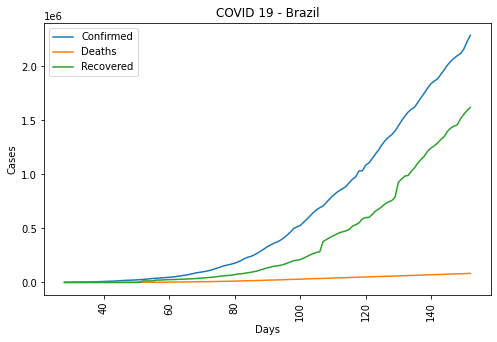

In [102]:
plot_covid19_data('Brazil', 'Days')

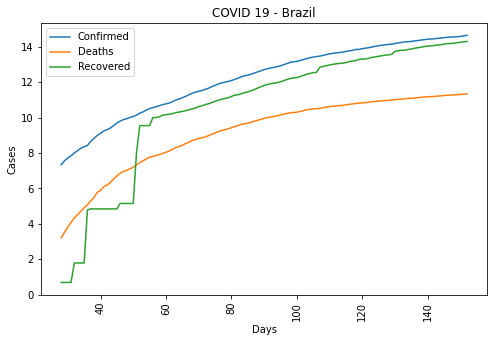

In [103]:
plot_covid19_data(country='Brazil', by='Days', log=True)